<a href="https://colab.research.google.com/github/servetgulnaroglu/Forecasting/blob/final/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Predicting Online Shoppers' Purchasing Intention: A Machine Learning Approach"**

## Dataset Details

Source: UCI Machine Learning Repository "Online Shoppers Purchasing Intention" ([link to the dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset))


The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

Attributes:
* Administrative (Number of pages visited by the visitor about account
management)
* Administrative_Duration (Total amount of time spent on account management-related
pages)
* Informational (Number of pages visited by the visitor about Web site, communication,
and transaction information)
* Informational_Duration (Total amount of time spent on informational-related pages)
* ProductRelated (Number of pages visited by the visitor about product-related
information)
* ProductRelated_Duration (Total amount of time spent on product-related pages)
* BounceRates (The percentage of visitors who enter the site from that page and then
leave without triggering any other requests)
* ExitRates (The percentage of pageviews on the site that were the last in the session)
* PageValues (The average value for a web page that a user visited before completing an
e-commerce transaction)
* SpecialDay (Closeness of the site visiting time to a special day)
* Month (Month value of the year)
* OperatingSystems (Operating system of the visitor)
* Browser (Browser of the visitor)
* Region (Geographical region from which the session has been started by the visitor)
* TrafficType (Traffic source type)
* VisitorType (New or Returning visitor)
* Weekend (Boolean value indicating if the visit is on a weekend)
* Revenue (Class label: True if the visitor made a purchase, False otherwise, to be
predicted)

 ## Exploratory Data Analysis (EDA)

### Load the dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [79]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Preprocessing

In [80]:
#Transform Revenue & Weekend features from boolean into binary, so that we can easily use them in our later calculations.
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

###  Visualize distributions of variables.

Numerical features

In [82]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [83]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [84]:
# List of numerical features
numerical_features = [
    "Administrative", "Administrative_Duration", "Informational",
    "Informational_Duration", "ProductRelated", "ProductRelated_Duration",
    "BounceRates", "ExitRates", "PageValues", "SpecialDay", "Revenue","Weekend",
]

# List of categorical features
categorical_features = [
    "OperatingSystems", "Browser", "Region",
    "TrafficType", "VisitorType",
    "Month",
]


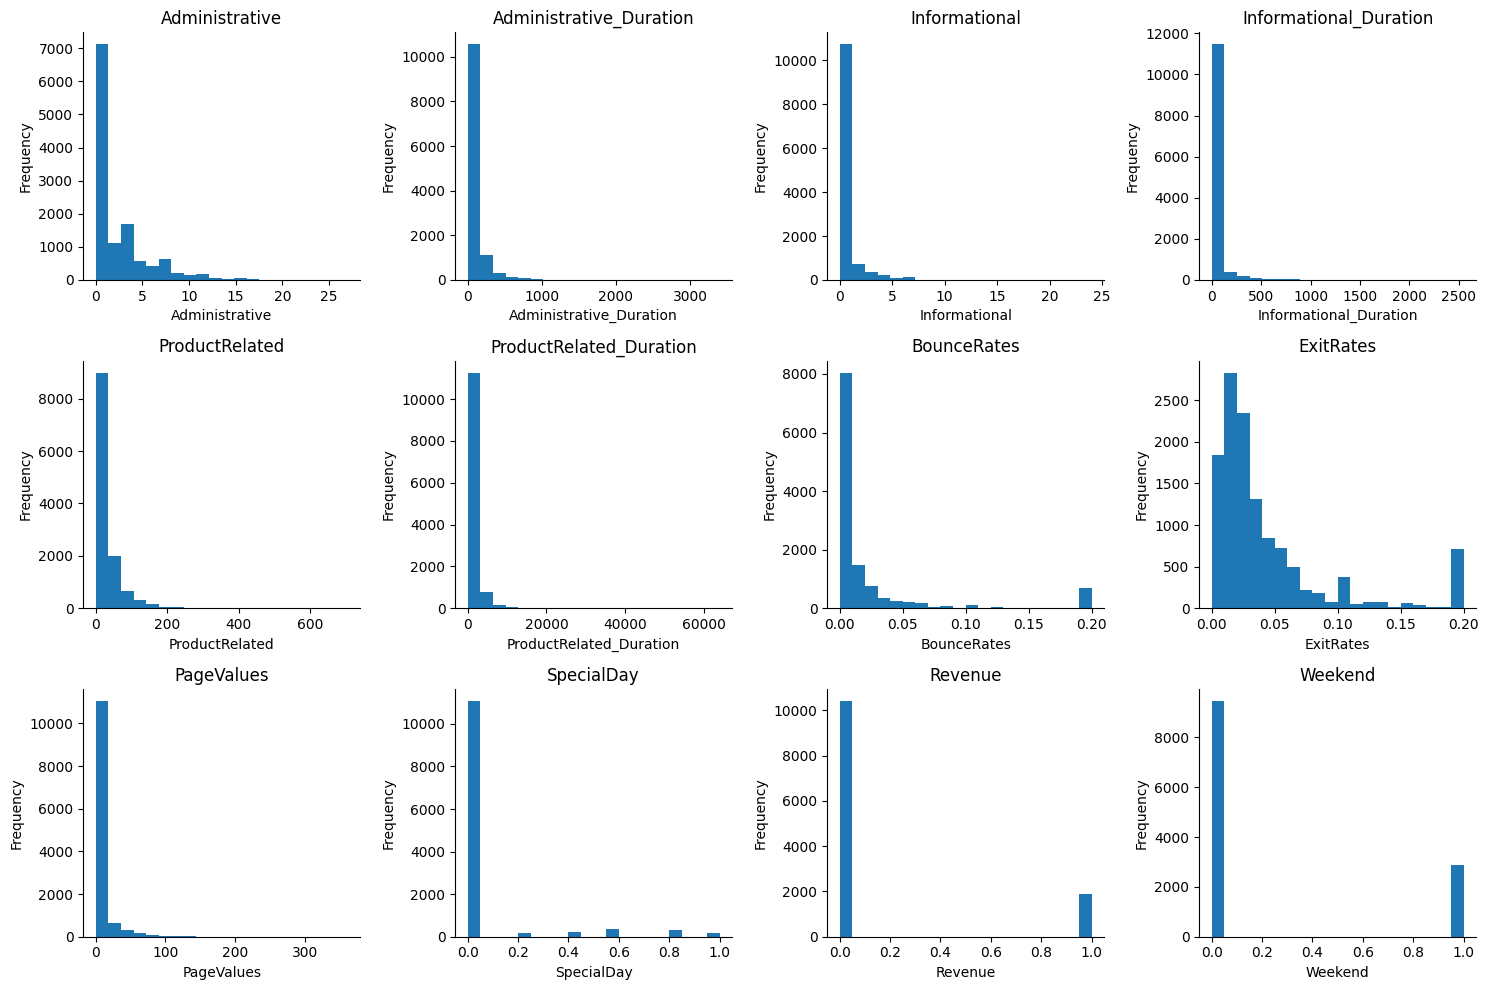

In [85]:
# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    df[feature].plot(kind='hist', bins=20, title=feature)
    plt.xlabel(feature)
    plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

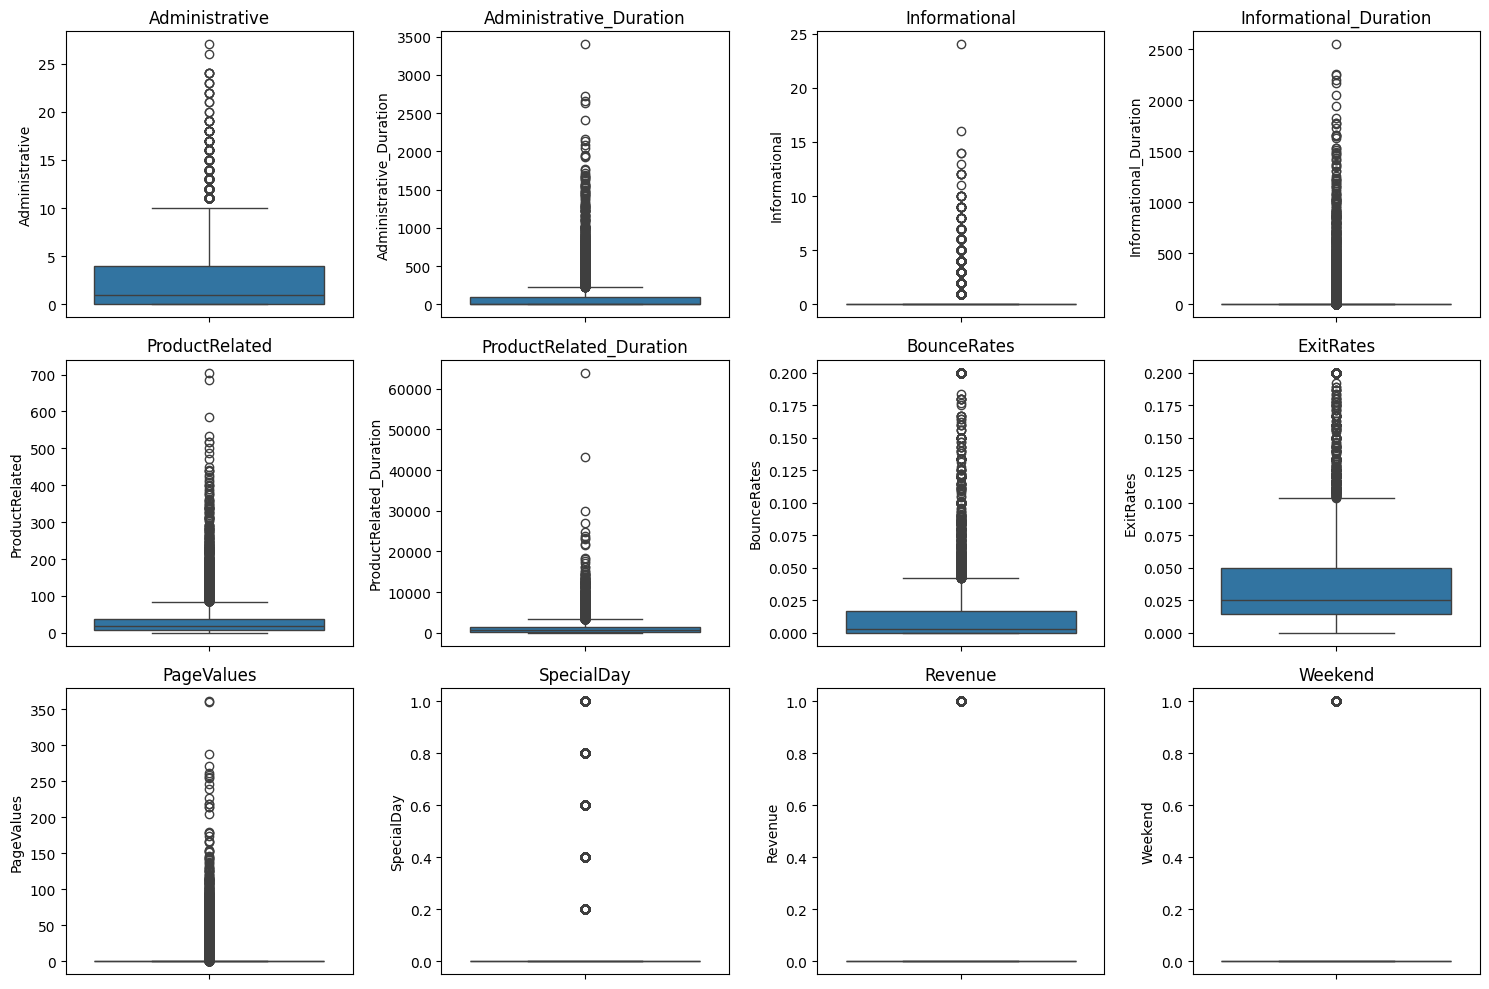

In [35]:
# Plot box plots for numerical features to identify outliers and visualize spread
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

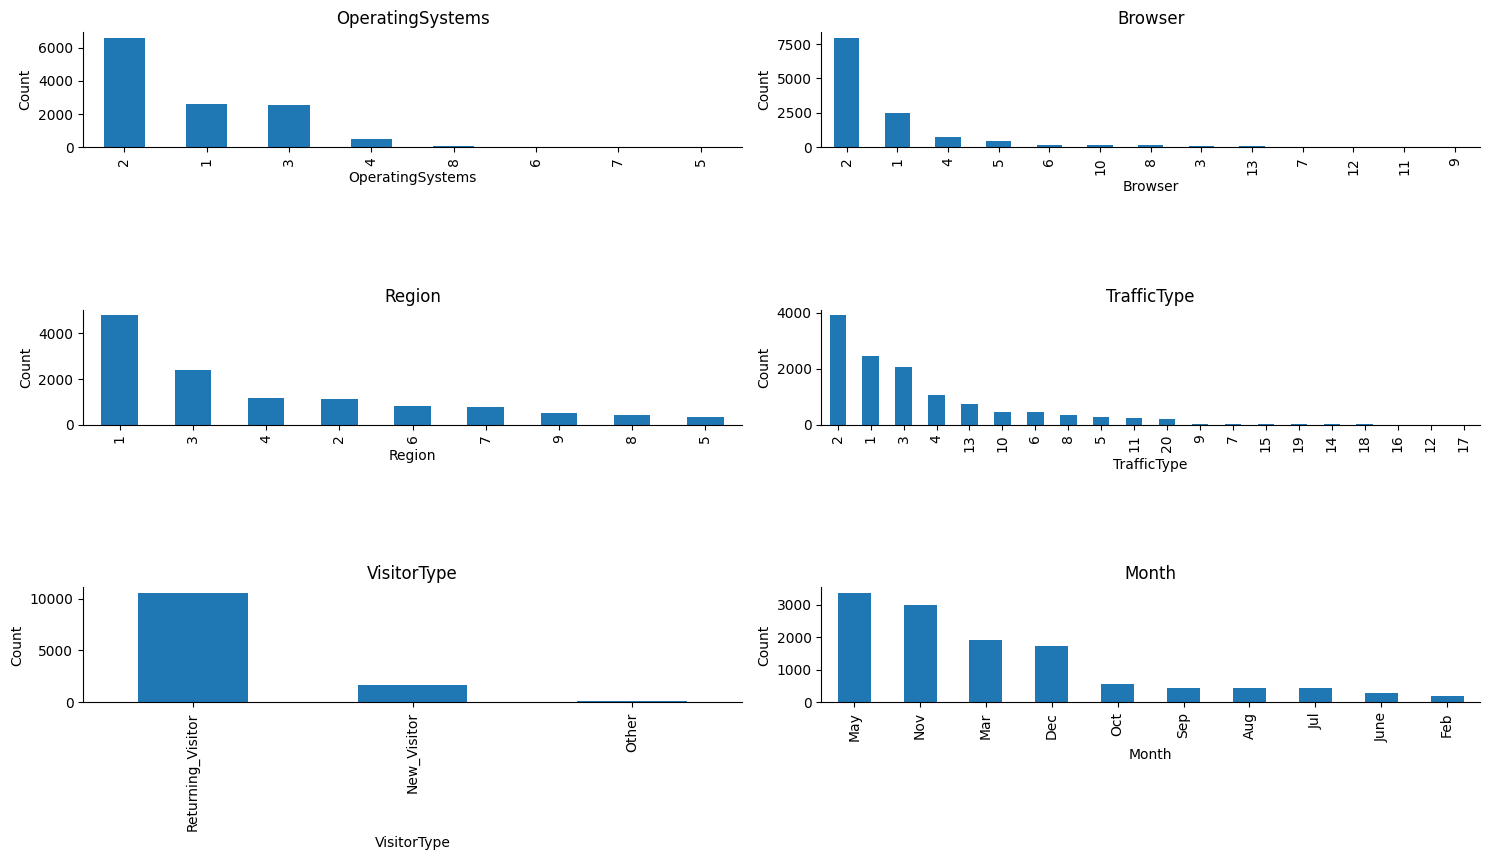

In [36]:
# Plot bar plots for categorical features to visualize the frequency of each category
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    df[feature].value_counts().plot(kind='bar', title=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

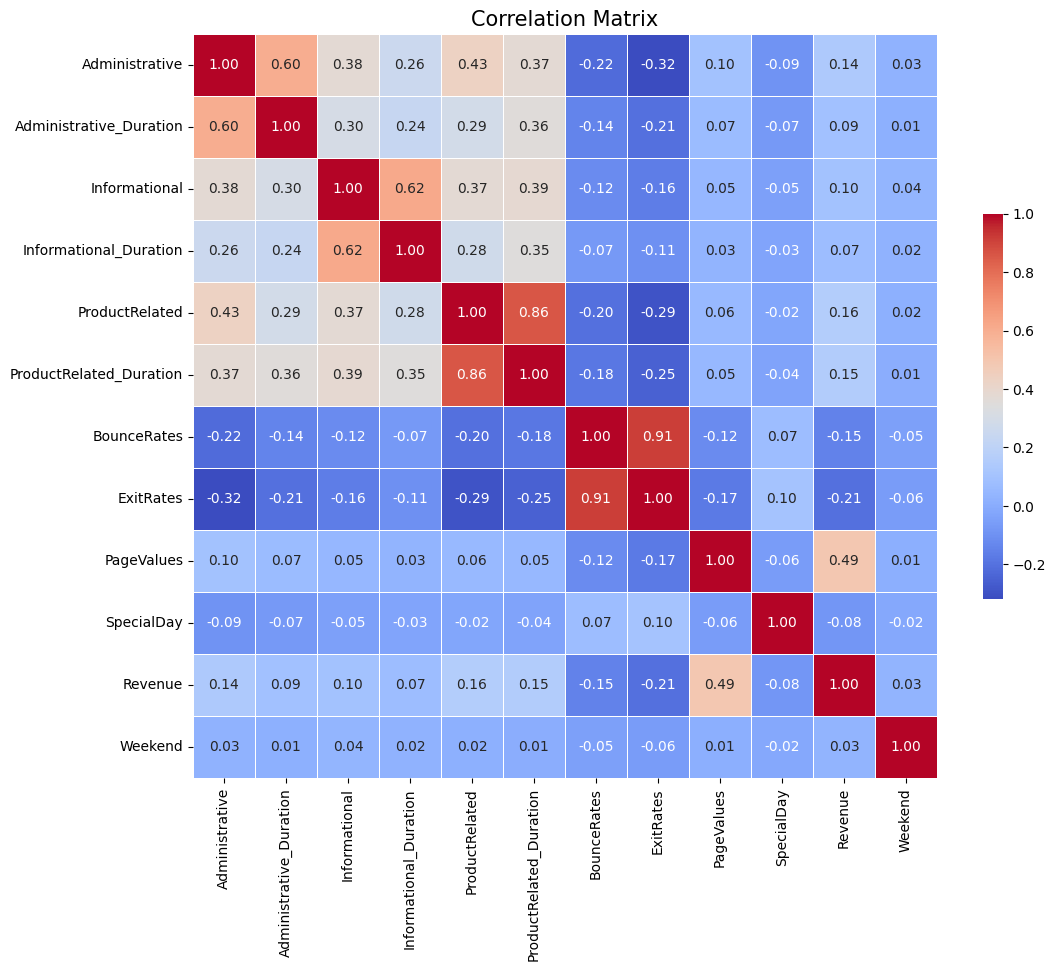

In [37]:
correlation_matrix = df[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title for the heatmap
plt.title("Correlation Matrix", size=15)

# Display the plot
plt.show()

Strong Positive Correlations:

* ProductRelated and ProductRelated_Duration (0.86): There is a strong positive correlation between the number of product-related pages visited and the total amount of time spent on those pages. This indicates that as visitors view more product-related pages, they also spend more time on these pages.
* BounceRates and ExitRates (0.91): There is a very strong positive correlation between bounce rates and exit rates. This suggests that pages with higher bounce rates also tend to have higher exit rates, indicating that visitors who leave the site immediately (bounce) often do so from the last page they visit (exit).

Moderate Positive Correlations:

* Administrative and Administrative_Duration (0.60): There is a moderate positive correlation between the number of administrative pages visited and the total time spent on these pages.
* Informational and Informational_Duration (0.62): There is a moderate positive correlation between the number of informational pages visited and the total time spent on these pages.
* Administrative and ProductRelated (0.43): There is a moderate positive correlation between the number of administrative pages visited and the number of product-related pages visited.

Negative Correlations:

* BounceRates and Administrative (-0.22): There is a slight negative correlation between bounce rates and the number of administrative pages visited. This indicates that as visitors view more administrative pages, the bounce rate tends to decrease slightly.
* ExitRates and Administrative (-0.32): There is a moderate negative correlation between exit rates and the number of administrative pages visited, suggesting that viewing more administrative pages is associated with a lower exit rate.
* ExitRates and ProductRelated (-0.29): There is a moderate negative correlation between exit rates and the number of product-related pages visited, indicating that as visitors view more product-related pages, the exit rate decreases.

Weak or No Correlations:

* Most other features show weak or no significant correlations with each other, indicating that they might independently influence the visitor's behavior on the website.

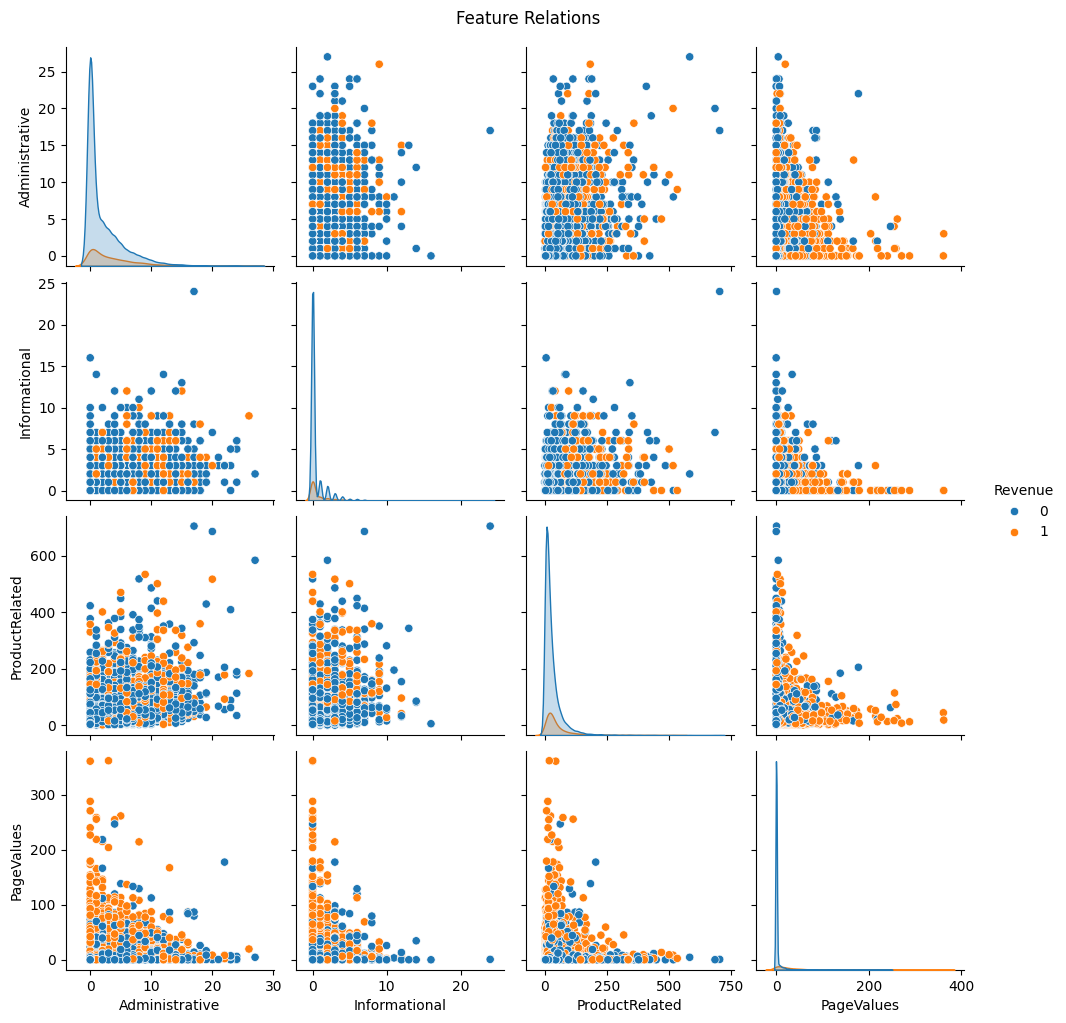

In [86]:
# Select a subset of numerical features and the target variable for the pairplot
selected_features = ['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']

# Create a pairplot to visualize the relationships between the selected features, colored by the 'Revenue' variable
g1 = sns.pairplot(df[selected_features], hue='Revenue')

# Set the title for the pairplot
g1.fig.suptitle('Feature Relations', y=1.02)

# Display the plot
plt.show()


A pairplot to visualize relationships between selected numerical features (Administrative, Informational, ProductRelated, PageValues) and the target variable Revenue, with data points colored by Revenue

Web Pages Analysis


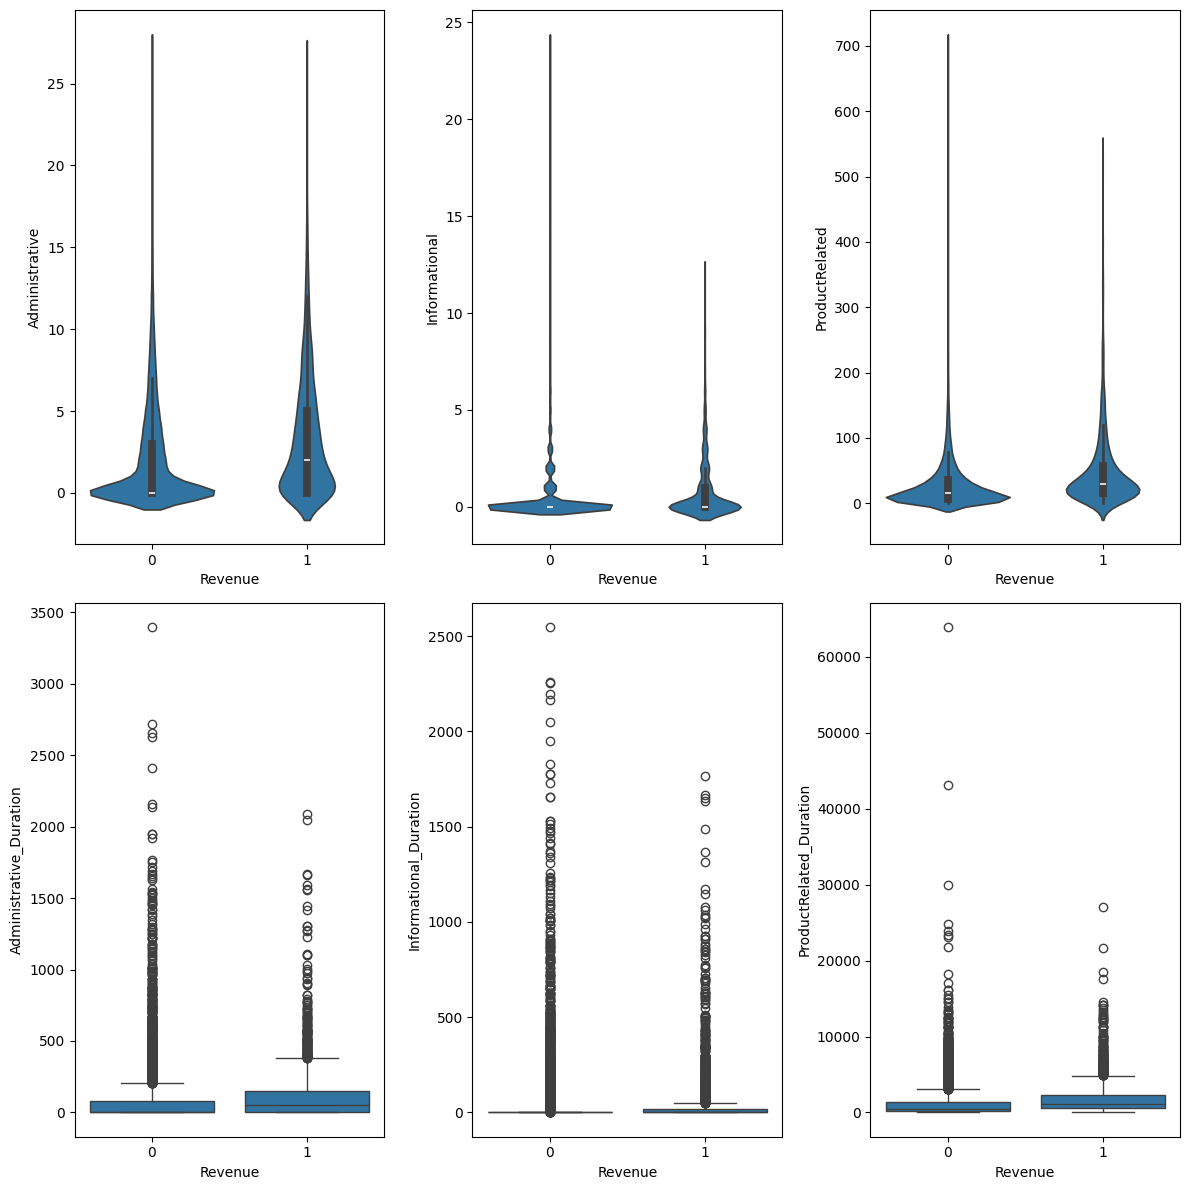

In [87]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

Based on the boxplots, we observe that visitors generally view fewer pages and spend less time on the site if they don't make a purchase. The number of product-related pages viewed and the time spent on them are significantly higher compared to account-related or informational pages. Additionally, the first three features appear to follow a skewed normal distribution.

Page Metrics Analysis


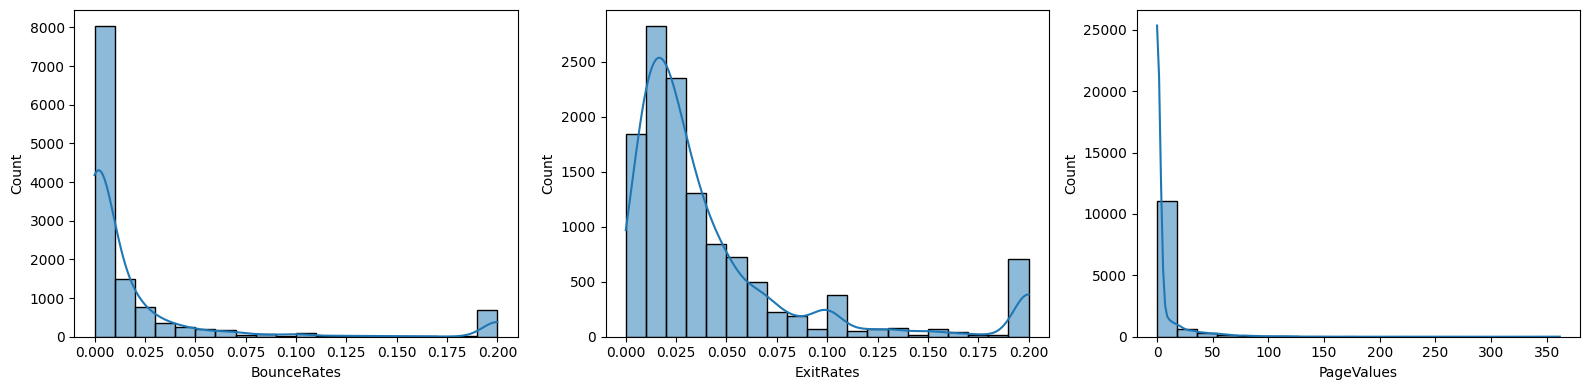

In [88]:
import warnings
warnings.filterwarnings("ignore")

# Create a figure with a specified size
fig = plt.figure(figsize=(16, 4))

# Add subplots to the figure
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Plot the distribution of BounceRates, ExitRates, and PageValues
sns.histplot(df['BounceRates'], bins=20, ax=ax1, kde=True)
sns.histplot(df['ExitRates'], bins=20, ax=ax2, kde=True)
sns.histplot(df['PageValues'], bins=20, ax=ax3, kde=True)

# Adjust layout for a clean fit
plt.tight_layout()

# Display the plots
plt.show()


* The distribution of BounceRates is highly skewed to the right, with the majority of values clustered near 0. This indicates that most visitors either do not bounce at all or bounce at very low rates. High bounce rates are relatively rare.
ExitRates:

* Similar to BounceRates, the ExitRates distribution is also right-skewed. Most visitors have low exit rates, meaning that a significant number of pageviews are not the last in the session. Higher exit rates occur less frequently.
PageValues:

* The distribution of PageValues is extremely right-skewed, with most values concentrated near 0. This suggests that the majority of pages visited by users have low page values, which might be indicative of fewer pages leading directly to e-commerce transactions. High page values are rare, indicating that only a small fraction of pages have significant value in terms of leading to transactions.


Visitor Analysis

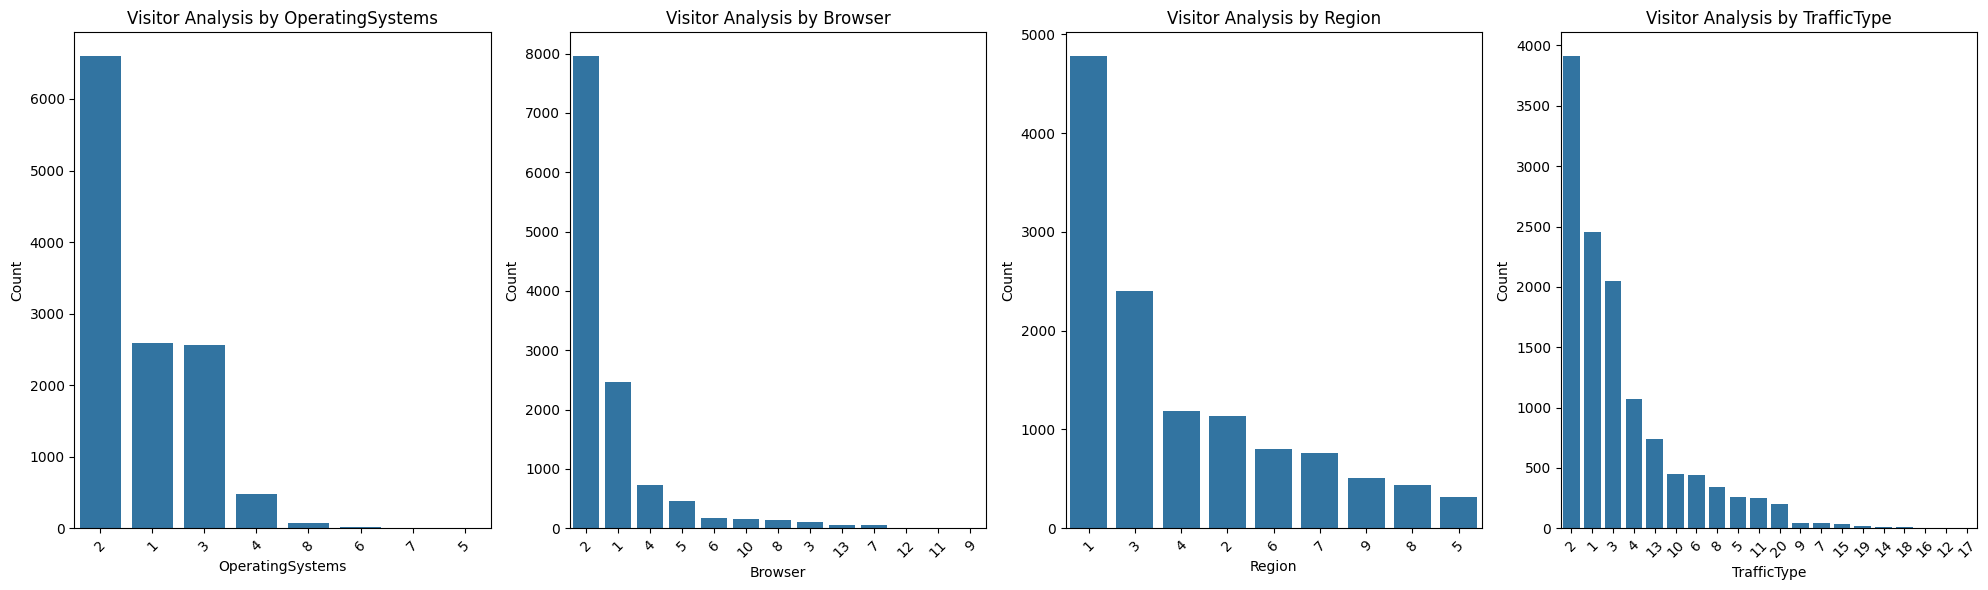

In [89]:
def visitor_analysis(features):
    plt.figure(figsize=(20, 6))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, len(features), i)
        sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
        plt.title(f'Visitor Analysis by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of categorical features for analysis
categorical_features_analysis = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

# Perform visitor analysis for the specified categorical features
visitor_analysis(categorical_features_analysis)


## Data Preprocessing

### Handle missing values

In [44]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


There are no missing values in the dataset.

### Encode categorical variables.

In [90]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical features for encoding
categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month', 'Weekend']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical features
encoded_categorical_data = encoder.fit_transform(df[categorical_features])

# Create a DataFrame from the encoded data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns from the DataFrame
df = df.drop(categorical_features, axis=1)

# Concatenate the encoded categorical DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_categorical_df], axis=1)

# Display the first few rows of the updated DataFrame
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekend_1
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Normalize/standardize numerical features.

In [91]:
# List of numerical features for standardization
numerical_features = [
    "Administrative", "Administrative_Duration", "Informational",
    "Informational_Duration", "ProductRelated", "ProductRelated_Duration",
    "BounceRates", "ExitRates", "PageValues", "SpecialDay"
]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_data = scaler.fit_transform(df_encoded[numerical_features])

# Create a DataFrame from the scaled data
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features)

# Drop the original numerical columns from the DataFrame
df_encoded = df_encoded.drop(numerical_features, axis=1)

# Concatenate the scaled numerical DataFrame with the encoded DataFrame
df_processed = pd.concat([df_encoded, scaled_numerical_df], axis=1)

# Display the first few rows of the updated DataFrame
df_processed.head()

,Revenue,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,...,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821


 ## Feature Engineering:

### Create new features based on existing data.

In [92]:
# Create new interaction features
df_processed['Admin_Info'] = df_processed['Administrative'] * df_processed['Informational']
df_processed['Admin_Prod'] = df_processed['Administrative'] * df_processed['ProductRelated']
df_processed['Info_Prod'] = df_processed['Informational'] * df_processed['ProductRelated']

# Create aggregated features
df_processed['Total_Duration'] = df_processed['Administrative_Duration'] + df_processed['Informational_Duration'] + df_processed['ProductRelated_Duration']
df_processed['Total_Pages'] = df_processed['Administrative'] + df_processed['Informational'] + df_processed['ProductRelated']

# Create ratio features
df_processed['Bounce_Exit_Ratio'] = df_processed['BounceRates'] / (df_processed['ExitRates'] + 1e-6)  # Adding a small constant to avoid division by zero

# Create difference features
df_processed['Prod_Info_Diff'] = df_processed['ProductRelated_Duration'] - df_processed['Informational_Duration']
df_processed['Prod_Admin_Diff'] = df_processed['ProductRelated_Duration'] - df_processed['Administrative_Duration']

# Display the first few rows of the updated DataFrame
df_processed.head()

,Revenue,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,...,PageValues,SpecialDay,Admin_Info,Admin_Prod,Info_Prod,Total_Duration,Total_Pages,Bounce_Exit_Ratio,Prod_Info_Diff,Prod_Admin_Diff
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.317178,-0.308821,0.276342,0.481624,0.273967,-1.326469,-1.784474,1.135593,-0.379417,-0.167156
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.317178,-0.308821,0.276342,0.465952,0.265053,-1.293024,-1.761989,-0.390690,-0.345972,-0.133711
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.317178,-0.308821,0.276342,0.481624,0.273967,-1.326469,-1.784474,1.135593,-0.379417,-0.167156
3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.317178,-0.308821,0.276342,0.465952,0.265053,-1.325076,-1.761989,0.287542,-0.378023,-0.165763
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.317178,-0.308821,0.276342,0.340576,0.193734,-0.998552,-1.582107,-0.317048,-0.051500,0.160761


Interaction Features
* Admin_Info:
  * Explanation: This feature represents the interaction between the number of administrative pages visited and the number of informational pages visited.
  * Usefulness: It can help capture the combined effect of administrative and informational activities on the likelihood of making a purchase. For example, visitors who frequently visit both types of pages might be more engaged and closer to making a purchase.

* Admin_Prod:

  * Explanation: This feature represents the interaction between the number of administrative pages visited and the number of product-related pages visited.
  * Usefulness: It can help capture the combined effect of administrative and product-related activities. Visitors who visit both administrative and product-related pages might be in the final stages of making a purchase decision.
* Info_Prod:

  * Explanation: This feature represents the interaction between the number of informational pages visited and the number of product-related pages visited.
  * Usefulness: It can help capture the combined effect of informational and product-related activities. Visitors who seek information about products and view product pages might be researching before making a purchase.

Aggregated Features

* Total_Duration:

  * Explanation: This feature represents the total time spent on administrative, informational, and product-related pages.
  * Usefulness: It provides an overall measure of engagement on the website. Visitors who spend more time on the site are likely to be more engaged and
  have a higher probability of making a purchase.

* Total_Pages:
  * Explanation: This feature represents the total number of administrative, informational, and product-related pages visited.
  * Usefulness: It provides an overall measure of the extent of browsing activity. Visitors who visit more pages are likely to be more interested in the content and products offered, which could lead to a purchase.

Ratio Features
* Bounce_Exit_Ratio:
  * Explanation: This feature represents the ratio of bounce rates to exit rates.
  * Usefulness: It can help identify visitors who leave the site immediately versus those who browse through multiple pages before leaving. A higher ratio might indicate a less engaged visitor, whereas a lower ratio might indicate a more engaged visitor who is more likely to make a purchase.


Difference Features

* Prod_Info_Diff:

  * Explanation: This feature represents the difference between the time spent on product-related pages and informational pages.
  * Usefulness: It can help identify the focus of the visitor. A positive value indicates more time spent on product-related pages, suggesting a higher interest in products, while a negative value indicates more time spent on informational pages.
* Prod_Admin_Diff:

  * Explanation: This feature represents the difference between the time spent on product-related pages and administrative pages.
  * Usefulness: It can help identify the focus of the visitor. A positive value indicates more time spent on product-related pages, suggesting a higher interest in products, while a negative value indicates more time spent on administrative tasks.

### Feature Selection

Before any feature selection


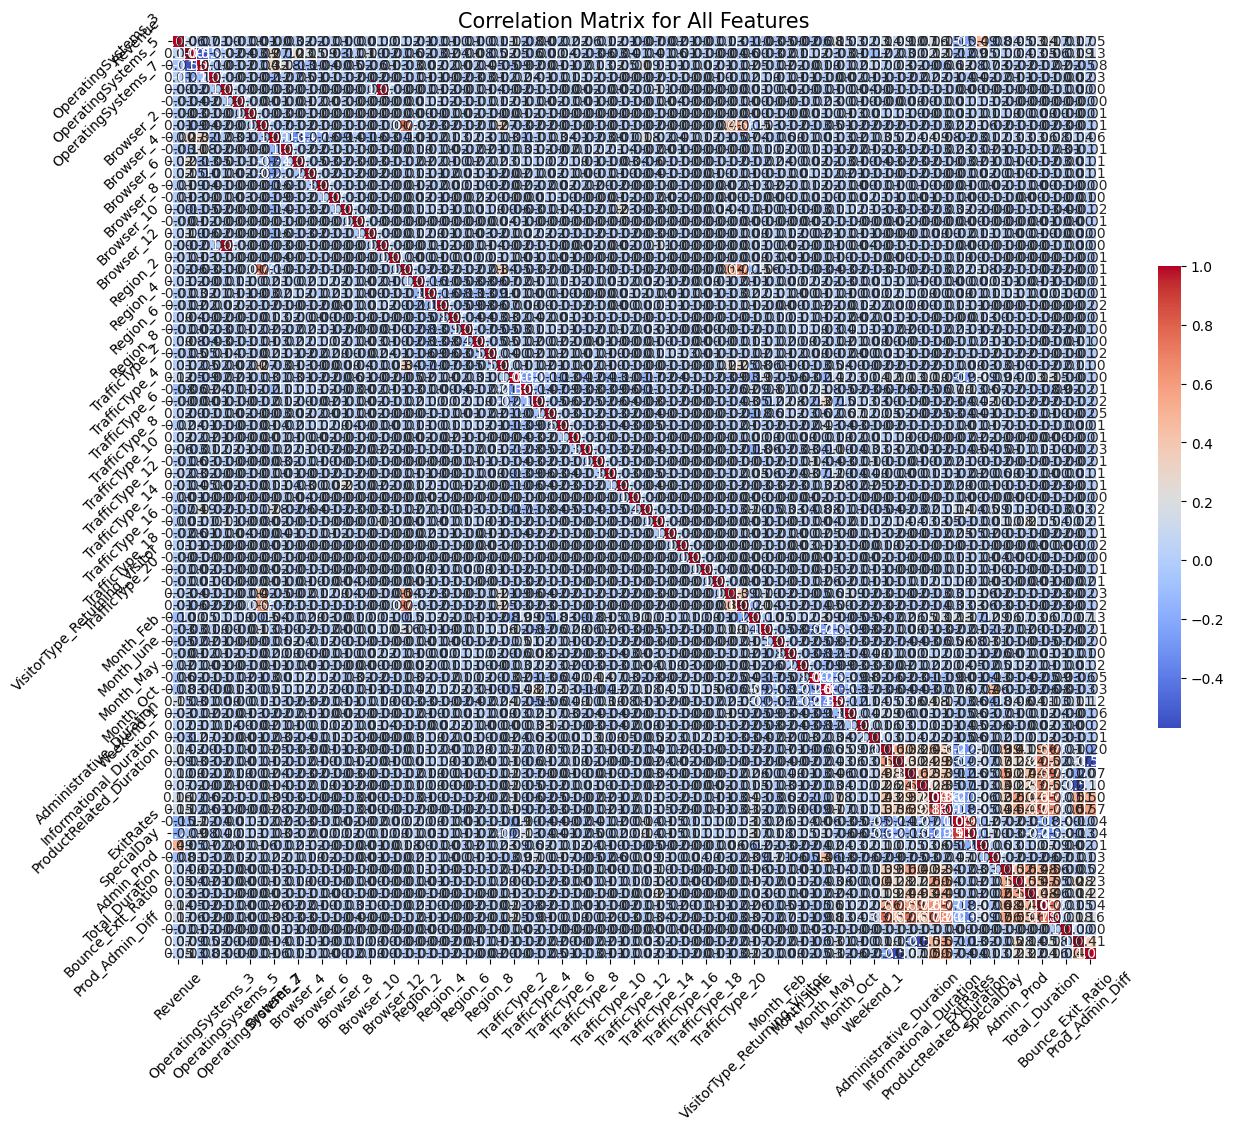

Model performance using all features:
Accuracy: 0.8959178156258448
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      3124
           1       0.75      0.50      0.60       575

    accuracy                           0.90      3699
   macro avg       0.83      0.73      0.77      3699
weighted avg       0.89      0.90      0.89      3699

Confusion Matrix:
 [[3028   96]
 [ 289  286]]


In [93]:
# Calculate the correlation matrix for all features and the target variable 'Revenue'
corr_matrix = df_processed.corr()

# Plot the correlation matrix for all features and the target variable
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix for All Features", size=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Separate features and target variable
X_all = df_processed.drop('Revenue', axis=1)
y_all = df_processed['Revenue']

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Train a Random Forest model using all features
model_all = RandomForestClassifier(n_estimators=100, random_state=42)
model_all.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model_all.predict(X_test_all)

# Evaluate the model
accuracy_all = accuracy_score(y_test_all, y_pred_all)
classification_report_all = classification_report(y_test_all, y_pred_all)
confusion_matrix_all = confusion_matrix(y_test_all, y_pred_all)

print("Model performance using all features:")
print("Accuracy:", accuracy_all)
print("Classification Report:\n", classification_report_all)
print("Confusion Matrix:\n", confusion_matrix_all)

In [103]:
# Filter features based on correlation with 'Revenue'
threshold = 0.01
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

# Create the final dataset with selected features
X_final_corr = df_processed[selected_features].drop('Revenue', axis=1)
y_final_corr = df_processed['Revenue']

# Display the first few rows of the final dataset
print("Selected Features in X_final_corr:")
print(X_final_corr.head())

# Split the data into training and testing sets
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_final_corr, y_final_corr, test_size=0.3, random_state=42)

# Train a new Random Forest model using the selected features
model_corr = RandomForestClassifier(n_estimators=100, random_state=42)
model_corr.fit(X_train_corr, y_train_corr)

# Make predictions on the test set
y_pred_corr = model_corr.predict(X_test_corr)

# Evaluate the model
print("Accuracy after correlation-based feature selection:", accuracy_score(y_test_corr, y_pred_corr))
print("Classification Report:\n", classification_report(y_test_corr, y_pred_corr))
print("Confusion Matrix:\n", confusion_matrix(y_test_corr, y_pred_corr))


df_processed_and_correlation_matrix_selection = df_processed[selected_features]

Selected Features in X_final_corr:
   PageValues  Total_Pages  ProductRelated  Month_Nov  \
0   -0.317178    -1.784474       -0.691003        0.0   
1   -0.317178    -1.761989       -0.668518        0.0   
2   -0.317178    -1.784474       -0.691003        0.0   
3   -0.317178    -1.761989       -0.668518        0.0   
4   -0.317178    -1.582107       -0.488636        0.0   

   ProductRelated_Duration  Total_Duration  Administrative  TrafficType_2  \
0                -0.624348       -1.326469       -0.696993            0.0   
1                -0.590903       -1.293024       -0.696993            1.0   
2                -0.624348       -1.326469       -0.696993            0.0   
3                -0.622954       -1.325076       -0.696993            0.0   
4                -0.296430       -0.998552       -0.696993            0.0   

   Informational  Administrative_Duration  ...  Month_Feb  Month_Mar  \
0      -0.396478                -0.457191  ...        1.0        0.0   
1      -0.39647

Feature Importance

Feature ranking:
1. Feature PageValues (0.31966855582064707)
2. Feature ExitRates (0.06363790713204057)
3. Feature ProductRelated_Duration (0.052889667269298994)
4. Feature Total_Duration (0.04861142920072473)
5. Feature Total_Pages (0.04549844408001677)
6. Feature Prod_Info_Diff (0.04384858351774493)
7. Feature Prod_Admin_Diff (0.04263828534685573)
8. Feature ProductRelated (0.04047912941567442)
9. Feature BounceRates (0.03797436629644216)
10. Feature Admin_Prod (0.03780081926205498)
11. Feature Info_Prod (0.03494715413294592)
12. Feature Administrative_Duration (0.03429216990605102)
13. Feature Admin_Info (0.023971271908255782)
14. Feature Administrative (0.022352210716492363)
15. Feature Month_Nov (0.01898061634499442)
16. Feature Informational_Duration (0.014375797682499105)
17. Feature VisitorType_Returning_Visitor (0.009946054024756667)
18. Feature Informational (0.008814414644517155)
19. Feature TrafficType_2 (0.00760071804693679)
20. Feature Weekend_1 (0.00744684481169808)
21. 

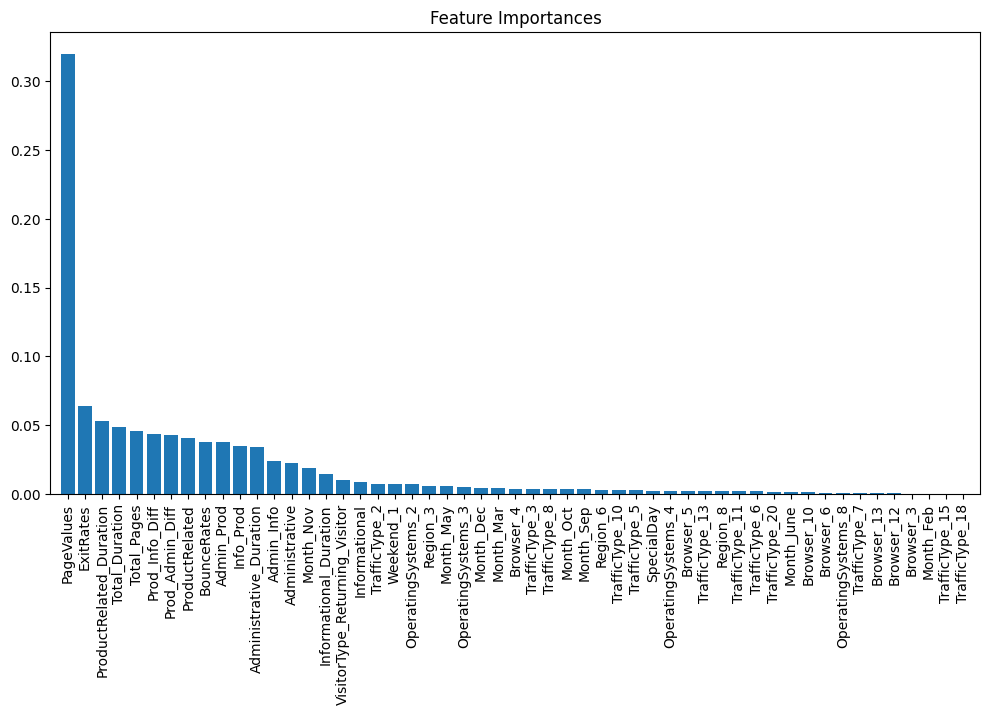

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = df_processed_and_correlation_matrix_selection.drop('Revenue', axis=1)
y = df_processed_and_correlation_matrix_selection['Revenue']

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

One interesting insight from this table is that we see Month_Nov is the heighest from all other months. It is most probably because of Black Friday discounts.

In [105]:
# Set a threshold to select important features (e.g., importance > 0.01)
threshold = 0.01
important_features = [X.columns[i] for i in indices if importances[i] > threshold]

#
# categorical_features = [col for col in X.columns if 'OperatingSystems' in col or 'Browser' in col or 'Region' in col or 'TrafficType' in col or 'VisitorType' in col or 'Month' in col or 'Weekend' in col]

# Combine important numerical features and all categorical features
# final_features = list(set(important_features + categorical_features))
final_features = list(set(important_features))

# Create the final dataset with selected features
X_final = X[final_features]

# Display the first few rows of the final dataset
X_final.head()

,ProductRelated,ExitRates,Administrative,Informational_Duration,Info_Prod,ProductRelated_Duration,Admin_Prod,Month_Nov,Prod_Info_Diff,Administrative_Duration,PageValues,Admin_Info,Prod_Admin_Diff,BounceRates,Total_Duration,Total_Pages
0,-0.691003,3.229316,-0.696993,-0.244931,0.273967,-0.624348,0.481624,0.0,-0.379417,-0.457191,-0.317178,0.276342,-0.167156,3.667189,-1.326469,-1.784474
1,-0.668518,1.171473,-0.696993,-0.244931,0.265053,-0.590903,0.465952,0.0,-0.345972,-0.457191,-0.317178,0.276342,-0.133711,-0.457683,-1.293024,-1.761989
2,-0.691003,3.229316,-0.696993,-0.244931,0.273967,-0.624348,0.481624,0.0,-0.379417,-0.457191,-0.317178,0.276342,-0.167156,3.667189,-1.326469,-1.784474
3,-0.668518,1.994610,-0.696993,-0.244931,0.265053,-0.622954,0.465952,0.0,-0.378023,-0.457191,-0.317178,0.276342,-0.165763,0.573535,-1.325076,-1.761989
4,-0.488636,0.142551,-0.696993,-0.244931,0.193734,-0.296430,0.340576,0.0,-0.051500,-0.457191,-0.317178,0.276342,0.160761,-0.045196,-0.998552,-1.582107


In [106]:

# Separate features and target variable
X_all = df_processed.drop('Revenue', axis=1)
y_all = df_processed['Revenue']

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Train a Random Forest model using all features
model_all = RandomForestClassifier(n_estimators=100, random_state=42)
model_all.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model_all.predict(X_test_all)

# Evaluate the model
accuracy_all = accuracy_score(y_test_all, y_pred_all)
classification_report_all = classification_report(y_test_all, y_pred_all)
confusion_matrix_all = confusion_matrix(y_test_all, y_pred_all)

print("Model performance before feature selection:")
print("Accuracy:", accuracy_all)
print("Classification Report:\n", classification_report_all)
print("Confusion Matrix:\n", confusion_matrix_all)

Model performance before feature selection:
Accuracy: 0.8959178156258448
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      3124
           1       0.75      0.50      0.60       575

    accuracy                           0.90      3699
   macro avg       0.83      0.73      0.77      3699
weighted avg       0.89      0.90      0.89      3699

Confusion Matrix:
 [[3028   96]
 [ 289  286]]


In [107]:
# Display the first few rows of the final dataset
print("Selected Features in X_final:")
print(X_final.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Train a new Random Forest model using the selected features
model_final = RandomForestClassifier(n_estimators=100, random_state=42)
model_final.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_final.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Selected Features in X_final:
   ProductRelated  ExitRates  Administrative  Informational_Duration  \
0       -0.691003   3.229316       -0.696993               -0.244931   
1       -0.668518   1.171473       -0.696993               -0.244931   
2       -0.691003   3.229316       -0.696993               -0.244931   
3       -0.668518   1.994610       -0.696993               -0.244931   
4       -0.488636   0.142551       -0.696993               -0.244931   

   Info_Prod  ProductRelated_Duration  Admin_Prod  Month_Nov  Prod_Info_Diff  \
0   0.273967                -0.624348    0.481624        0.0       -0.379417   
1   0.265053                -0.590903    0.465952        0.0       -0.345972   
2   0.273967                -0.624348    0.481624        0.0       -0.379417   
3   0.265053                -0.622954    0.465952        0.0       -0.378023   
4   0.193734                -0.296430    0.340576        0.0       -0.051500   

   Administrative_Duration  PageValues  Admin_Info  Prod

We see that combination of correlation matrix feature extraction and feature importance feature selection combined affected the accuracy in negative way.
* Before any feature selection accuracy was: 0.8959178156258448
* After feature selection on both correlation matrix and feature importance: 0.8953771289537713

!!! Now we try only feature importance

Feature ranking:
1. Feature PageValues (0.3062901454494678)
2. Feature ExitRates (0.05247723548797869)
3. Feature ProductRelated_Duration (0.04848177754202543)
4. Feature Total_Duration (0.043324073145931924)
5. Feature Prod_Info_Diff (0.04030143224527762)
6. Feature Total_Pages (0.03992799231556871)
7. Feature Bounce_Exit_Ratio (0.03974287706122517)
8. Feature Prod_Admin_Diff (0.03861621240497273)
9. Feature ProductRelated (0.03593743948509767)
10. Feature BounceRates (0.034741206636157346)
11. Feature Admin_Prod (0.03461752528344976)
12. Feature Info_Prod (0.03271693037308824)
13. Feature Administrative_Duration (0.03150648732943693)
14. Feature Admin_Info (0.02295864337418742)
15. Feature Administrative (0.022336848810443535)
16. Feature Month_Nov (0.017752545523061682)
17. Feature Informational_Duration (0.014641465558640515)
18. Feature VisitorType_Returning_Visitor (0.010433995606980093)
19. Feature Informational (0.008916398409838953)
20. Feature TrafficType_2 (0.007777073770982

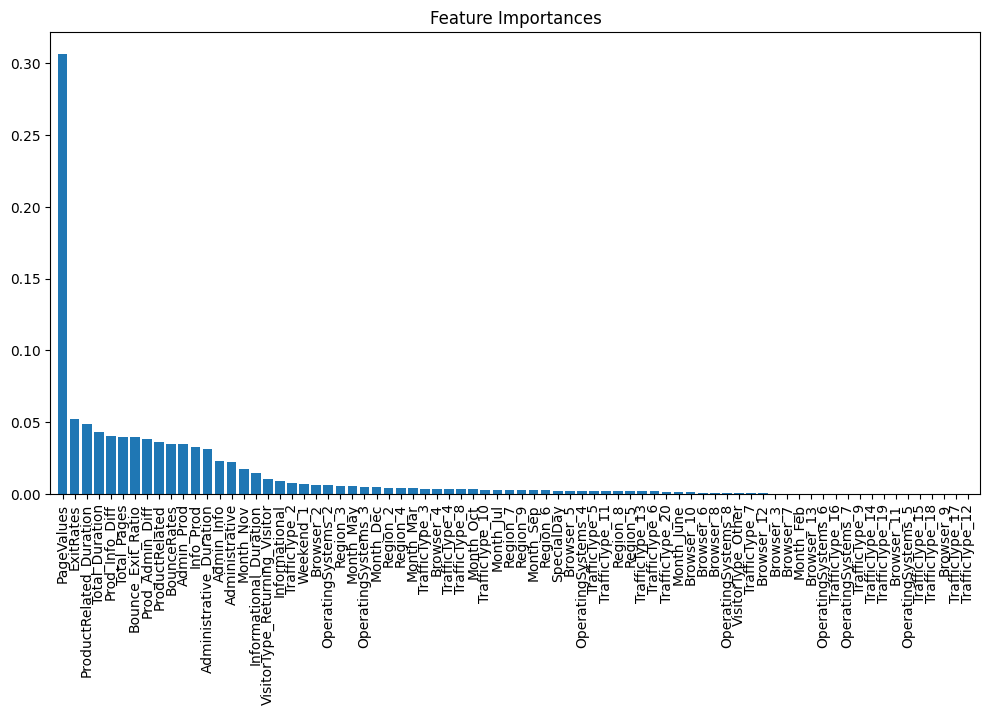

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = df_processed.drop('Revenue', axis=1)
y = df_processed['Revenue']

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [109]:
# Set a threshold to select important features (e.g., importance > 0.01)
threshold = 0.01
important_features = [X.columns[i] for i in indices if importances[i] > threshold]

#
# categorical_features = [col for col in X.columns if 'OperatingSystems' in col or 'Browser' in col or 'Region' in col or 'TrafficType' in col or 'VisitorType' in col or 'Month' in col or 'Weekend' in col]

# Combine important numerical features and all categorical features
# final_features = list(set(important_features + categorical_features))
final_features = list(set(important_features))

# Create the final dataset with selected features
X_final = X[final_features]

# Display the first few rows of the final dataset
X_final.head()

,ProductRelated,ExitRates,Administrative,Bounce_Exit_Ratio,Informational_Duration,VisitorType_Returning_Visitor,Info_Prod,ProductRelated_Duration,Admin_Prod,Month_Nov,Prod_Info_Diff,Administrative_Duration,PageValues,Admin_Info,Prod_Admin_Diff,BounceRates,Total_Duration,Total_Pages
0,-0.691003,3.229316,-0.696993,1.135593,-0.244931,1.0,0.273967,-0.624348,0.481624,0.0,-0.379417,-0.457191,-0.317178,0.276342,-0.167156,3.667189,-1.326469,-1.784474
1,-0.668518,1.171473,-0.696993,-0.390690,-0.244931,1.0,0.265053,-0.590903,0.465952,0.0,-0.345972,-0.457191,-0.317178,0.276342,-0.133711,-0.457683,-1.293024,-1.761989
2,-0.691003,3.229316,-0.696993,1.135593,-0.244931,1.0,0.273967,-0.624348,0.481624,0.0,-0.379417,-0.457191,-0.317178,0.276342,-0.167156,3.667189,-1.326469,-1.784474
3,-0.668518,1.994610,-0.696993,0.287542,-0.244931,1.0,0.265053,-0.622954,0.465952,0.0,-0.378023,-0.457191,-0.317178,0.276342,-0.165763,0.573535,-1.325076,-1.761989
4,-0.488636,0.142551,-0.696993,-0.317048,-0.244931,1.0,0.193734,-0.296430,0.340576,0.0,-0.051500,-0.457191,-0.317178,0.276342,0.160761,-0.045196,-0.998552,-1.582107


In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Train a new Random Forest model using the selected features
model_final = RandomForestClassifier(n_estimators=100, random_state=42)
model_final.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_final.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8975398756420654
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.73      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

Confusion Matrix:
 [[3006  118]
 [ 261  314]]


We improved the accuracy. I tried threshold with 0.05, 0.01, 0.02, 0.03, 0.04 the heighest one was 0.01

* Before any feature selection accuracy was: 0.8959178156258448
* After only feature selection with feature importance: 0.8975398756420654

## Model Building

### Split the dataset into training and testing sets.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)


### Training with Multiple Models

Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Train a Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]))

Logistic Regression Performance:
Accuracy: 0.88294133549608
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.76      0.36      0.49       575

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699

Confusion Matrix:
 [[3060   64]
 [ 369  206]]
ROC-AUC Score: 0.8967661303791126


Decision Tree


In [114]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1]))

Decision Tree Performance:
Accuracy: 0.857529061908624
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      3124
           1       0.54      0.53      0.54       575

    accuracy                           0.86      3699
   macro avg       0.73      0.72      0.73      3699
weighted avg       0.86      0.86      0.86      3699

Confusion Matrix:
 [[2868  256]
 [ 271  304]]
ROC-AUC Score: 0.7230729833546735


In [115]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1]))


Random Forest Performance:
Accuracy: 0.8975398756420654
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.73      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

Confusion Matrix:
 [[3006  118]
 [ 261  314]]
ROC-AUC Score: 0.9107977509324723


In [116]:
from sklearn.svm import SVC

# Train an SVM model
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1]))


SVM Performance:
Accuracy: 0.8786158421194917
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      3124
           1       0.80      0.29      0.43       575

    accuracy                           0.88      3699
   macro avg       0.84      0.64      0.68      3699
weighted avg       0.87      0.88      0.85      3699

Confusion Matrix:
 [[3083   41]
 [ 408  167]]
ROC-AUC Score: 0.8413427601180203


XGBoost

In [117]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Train an XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]))


XGBoost Performance:
Accuracy: 0.8926736955934036
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      3124
           1       0.69      0.57      0.62       575

    accuracy                           0.89      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699

Confusion Matrix:
 [[2977  147]
 [ 250  325]]
ROC-AUC Score: 0.9023999331960141


We have the heights ROC-AUC score on XGBoost, indicating that it is capable of distinguishing between the positive and negative classes effectively. The accuracy is also high at 0.8927. The model performs well in predicting the majority class (Class 0), but the precision and recall for the minority class (Class 1) are lower, which is a common issue in imbalanced datasets.

## Model Optimization

Since the Random Forest has the heighest ROC-AUC Score, meaning it is the most powerfull among all in distinguishing classes, I will run it again with GridSearchCV:

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the parameter grid
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='roc_auc', cv=5, n_jobs=-1, verbose=10)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance with GridSearchCV:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]))

# Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Performance with GridSearchCV:
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8988915923222492
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      3124
           1       0.74      0.54      0.62       575

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

Confusion Matrix:
 [[3015  109]
 [ 265  310]]
ROC-AUC Score: 0.9197494850526081


F1 Score for Class 0: 0.94
F1 Score for Class 1: 0.62
Macro Average F1 Score: 0.78
Weighted Average F1 Score: 0.89

Accuracy: 90%

Now our accuracy has the heighest value until now.

## Insights And Conclusion


### Model Evaluation

The Random Forest model with hyperparameter tuning using GridSearchCV provided the following results:

Best Parameters: `{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}`

Accuracy: 0.8988915923222492

Classification Report:
```
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      3124
           1       0.74      0.54      0.62       575

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699


```



Confusion Matrix:
 [[3015  109]
 [ 265  310]]

ROC-AUC Score: 0.9197494850526081

```
Best Parameters:
bootstrap: True
max_depth: 10
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 200
Model Performance Metrics:

Accuracy: 0.8989
ROC-AUC Score: 0.9197
Classification Report
Class 0 (No Purchase):

Precision: 0.92
Recall: 0.97
F1-Score: 0.94
Support: 3124
Class 1 (Purchase):

Precision: 0.74
Recall: 0.54
F1-Score: 0.62
Support: 575
Macro Average:

Precision: 0.83
Recall: 0.75
F1-Score: 0.78
Weighted Average:

Precision: 0.89
Recall: 0.90
F1-Score: 0.89
Confusion Matrix
True Negatives (TN): 3015
False Positives (FP): 109
False Negatives (FN): 265
True Positives (TP): 310

```





### Insights

1. High Accuracy and ROC-AUC:
  * The model achieved a high accuracy of 89.89% and an impressive ROC-AUC score of 0.9197, indicating that the model is capable of distinguishing between purchases and non-purchases effectively.

2. Class 0 Performance (No Purchase):
  * The model performs exceptionally well in predicting Class 0 with an F1-score of 0.94, high precision (0.92), and high recall (0.97). This indicates that the model is very accurate in identifying sessions where no purchase was made.

3. Class 1 Performance (Purchase):
  * The model's performance in predicting Class 1 is lower, with an F1-score of 0.62. While the precision is reasonably high at 0.74, the recall is lower at 0.54. This suggests that the model is less effective at identifying all instances of purchases.

4. Balance Between Precision and Recall:
  * The weighted average F1-score of 0.89 indicates a good balance between precision and recall across both classes, taking into account the class distribution.

### Conclusion


The Random Forest model with hyperparameter tuning via GridSearchCV has demonstrated robust performance in predicting whether a visitor will make a purchase. The high accuracy and ROC-AUC score highlight the model's ability to effectively distinguish between purchasing and non-purchasing sessions. However, there is a notable disparity in performance between the two classes:

* Strengths:

1. The model is highly effective in predicting non-purchase sessions, which are more frequent in the dataset.
2. The high precision for purchase predictions indicates that when the model predicts a purchase, it is likely to be correct.


* Weaknesses:

1. The model's lower recall for purchase predictions suggests that it misses a significant number of actual purchases. This is an area that could benefit from further improvement.